# Fashion MNIST(분류)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


## 데이터셋 생성

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# 괄호 빼면 안됨. train_test_split
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

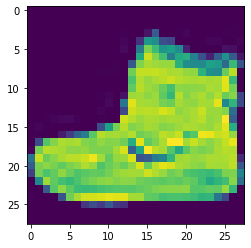

In [5]:
import matplotlib.pyplot as plt
# 이미지 출력
plt.imshow(X_train[0])
plt.show()

In [6]:
# 정규화!! 필요하다.
# 해당 이미지 그라데이션은 1 ~ 255
# 이미지마다 다르게 정규화를 시켜줘야 한다. 숫자가 크면 더 정밀하게 해준다.
X_train = X_train / 255.0
X_test = X_test / 255.0

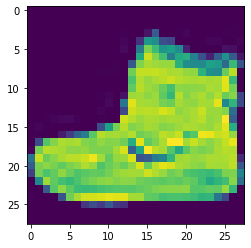

In [7]:
import matplotlib.pyplot as plt
# 이미지 출력
plt.imshow(X_train[0])
plt.show()

# 결과는 똑같은데 왜?? -> 자세히 보면 다름.

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
y_train.shape

(60000,)

## 모델 구성

In [10]:
# 이미지는 일반적인 데이터와 달라서 ㅁ를 ㅡ로 만들어줘야 한다. Flatten 사용
model = tf.keras.Sequential([
  # 2D(ex) (10, 10)) -> 1D(ex) (100))
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(units = 200, activation = 'relu'),
  tf.keras.layers.Dense(units = 10, activation = 'softmax') # 다중 분류니 나오는 것은 softmax로
])

## 학습 설정

In [11]:
# 10개의 결과니까 다항분류 loss = 'categorical_crossentropy'
model.compile(loss = 'sparse_categorical_crossentropy') 
# but image 데이터를 전처리하지 않았기 때문에 'sparse_categorical_crossentropy'
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


## 학습

이미지를 처리하는데 shape에 에러가 난다.

In [12]:
history = model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6360
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3724
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3460
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3250
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2863
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2850
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2827
Epoch 11/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2706
Epoch 12/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2704
E

## 평가

In [13]:
history.history['loss']

[0.49594366550445557,
 0.3720185458660126,
 0.3454298973083496,
 0.3301350474357605,
 0.32005181908607483,
 0.3092798888683319,
 0.3022574186325073,
 0.29563742876052856,
 0.2893730103969574,
 0.2836945354938507,
 0.2791214883327484,
 0.2736438810825348,
 0.26858291029930115,
 0.26151135563850403,
 0.2573311924934387,
 0.25622430443763733,
 0.25421276688575745,
 0.25085705518722534,
 0.24342700839042664,
 0.24288707971572876,
 0.2354077696800232,
 0.23472589254379272,
 0.23030665516853333,
 0.22816990315914154,
 0.221795454621315]

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.5586


0.5585811734199524

# 결론

이미지 분류(다항 분류)
- 이미지 특징 -> Flatten
- Loss를 잘 결정해야 한다. 
  - **categorical_crossentropy : 다항분류** but 종류가 많다.